# Importing the Libraries and Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/home/dell/Téléchargements/Data/jnotebook/heart.csv')

# Data Analysis

## General info

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.shape

(1025, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data cleaning

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
dp_val = df.duplicated().any()
print(dp_val)

True


In [20]:
df = df.drop_duplicates()

In [22]:
dp_val = df.duplicated().any()
print(dp_val)

False


In [24]:
df.shape

(302, 14)

# Machine learning

## Data processing

### Separating columns based on categorical values and continuous values

In [26]:
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [28]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [30]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding categorical data

In [34]:
df['cp'].unique()

array([0, 1, 2, 3])

In [36]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns=cate_val,drop_first=True)
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### Feature scalling

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [44]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## Models

### Splitting into train and test data

In [48]:
X = df.drop('target', axis=1)
y = df['target']

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred1 = log.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### Support vector classier

In [79]:
from sklearn import svm

In [93]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [95]:
y_pred2 = svm.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

### KNearest Neighbors classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred31 = knn.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred31)

0.7377049180327869

In [99]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [101]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [107]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8032786885245902

## Non linear ml algorithms

In [ ]:
#In this case no data processing is needed

In [109]:
df = pd.read_csv('/home/dell/Téléchargements/Data/jnotebook/heart.csv')

In [111]:
df = df.drop_duplicates()

In [113]:
df.shape

(302, 14)

In [115]:
X = df.drop('target', axis=1)
y = df['target']

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

### Decision tree classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [127]:
y_pred4 = dt.predict(X_test)

In [129]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

### Random forest classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
y_pred5 = rf.predict(X_test)

In [137]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

### Gradient Boosting classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gdc = GradientBoostingClassifier()
gdc.fit(X_train, y_train)

GradientBoostingClassifier()

In [144]:
y_pred6 = gdc.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred6)

0.819672131147541

## Choosing the best model

In [162]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'], 'Acc':[accuracy_score(y_test,y_pred1),
                                                                          accuracy_score(y_test,y_pred2),
                                                                          accuracy_score(y_test,y_pred3),
                                                                          accuracy_score(y_test,y_pred4),
                                                                          accuracy_score(y_test,y_pred5),
                                                                          accuracy_score(y_test,y_pred6)]})

In [164]:
final_data

,Models,Acc
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.721311
4,RF,0.836066
5,GB,0.819672


<Axes: xlabel='Models', ylabel='count'>

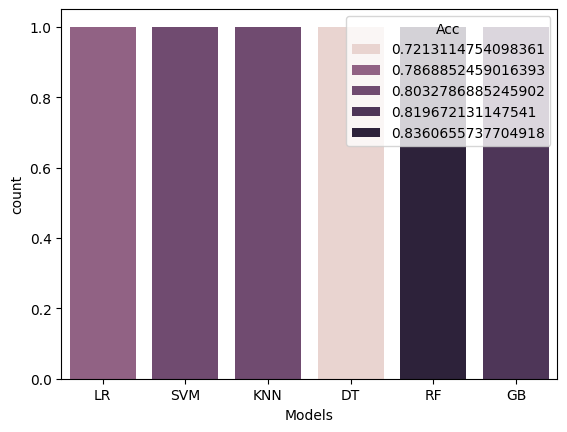

In [168]:
 sns.countplot(data=final_data, x=final_data['Models'], hue=final_data['Acc'])

## Training the best model on the entire dataset 

In [176]:
X = df.drop('target', axis=1)
y = df['target']

In [178]:
X.shape

(302, 13)

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [ ]:
prediction on new data

In [184]:
import pandas as pd

In [186]:
new_data = pd.DataFrame({
'age':52,
'sex':1,
'cp':0,
'trestbps':125,
'chol':212,
'fbs':0,
'restecg':1,
'thalach':168,
'exang':0,
'oldpeak':1.0,
'slope':2,
'ca':2,
'thal':3,
}, index = [0])

In [188]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [190]:
p = rf.predict(new_data)
if p[0] == 0:
    print('No Disease')
else:
    print('Disease')

No Disease


## Save model

In [192]:
import joblib

In [194]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [ ]:
model = joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)